###NYC Public School Test Scores EDA

#Import necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [8]:
df = pd.read_csv('schools.csv')

# Display the first few rows of the dataset

In [9]:
df.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Basic dataset information

In [10]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB
None

Summary Statistics:
       average_math  average_reading  average_writing  percent_tested
count    375.000000       375.000000       375.000000      355.000000
mean     432.944000       424.504000       418.458667       64.976338
std       71.952373        61.881069        64.548599       18.747634
min      317.000000       302.000000       284.000000       18.500000
25%      386.000000       386

# Check for missing values

In [11]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64


# Visualize missing data

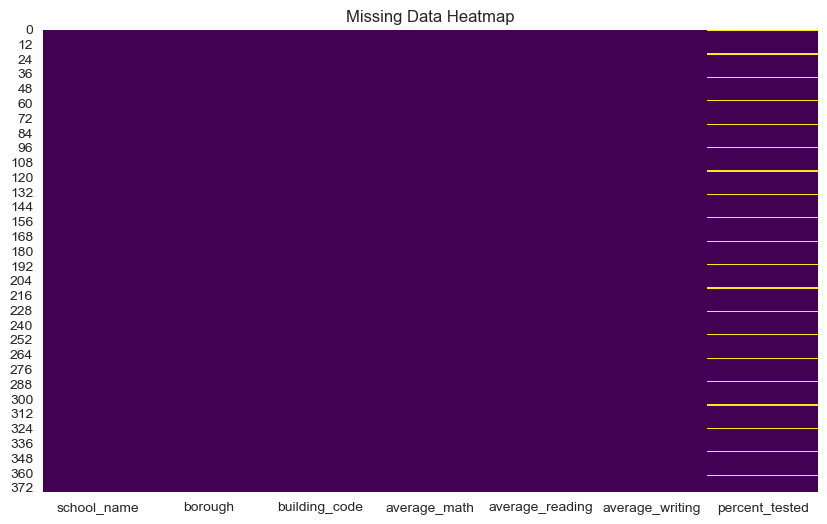

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.savefig("plots/missing_data_heatmap.png")
plt.show()

# Analyze numeric columns

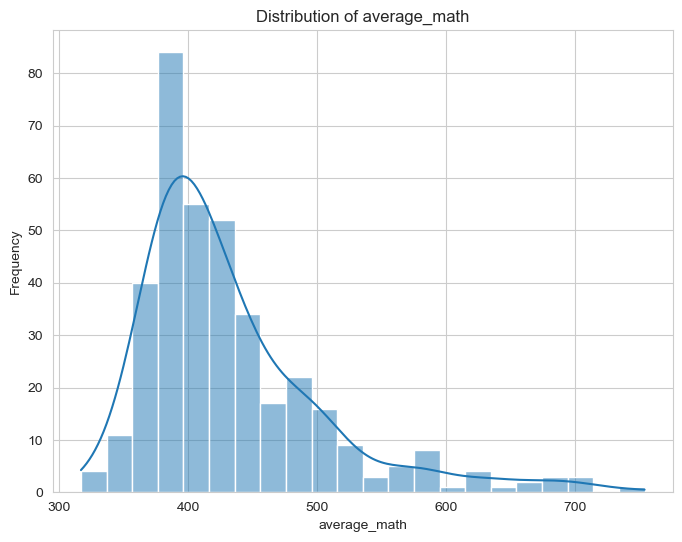

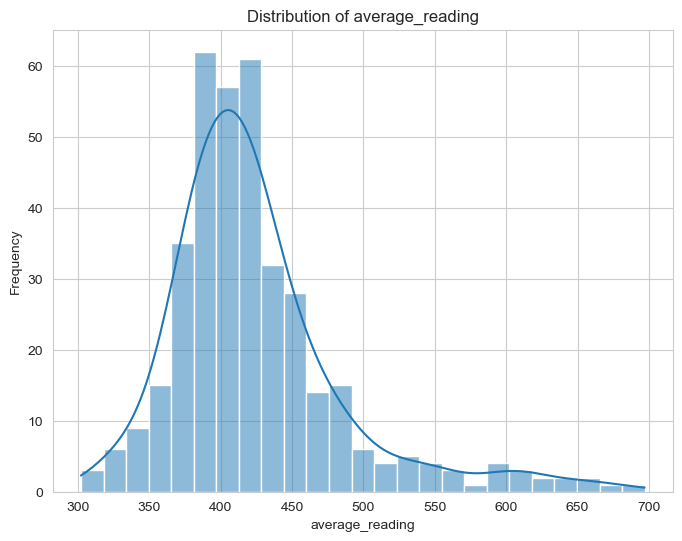

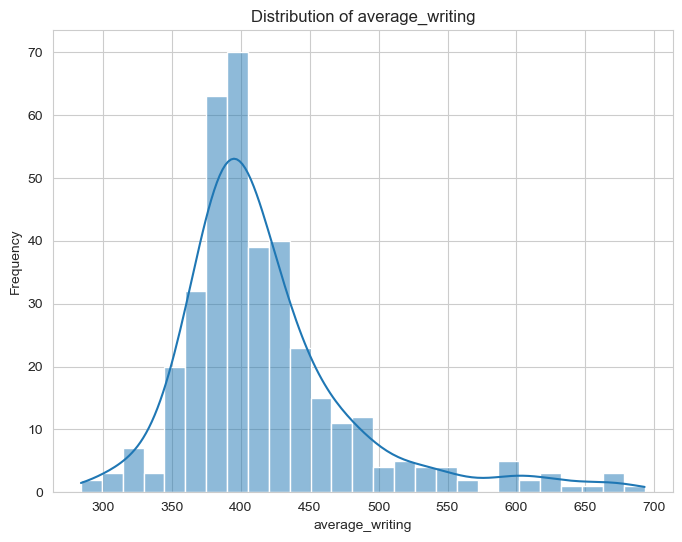

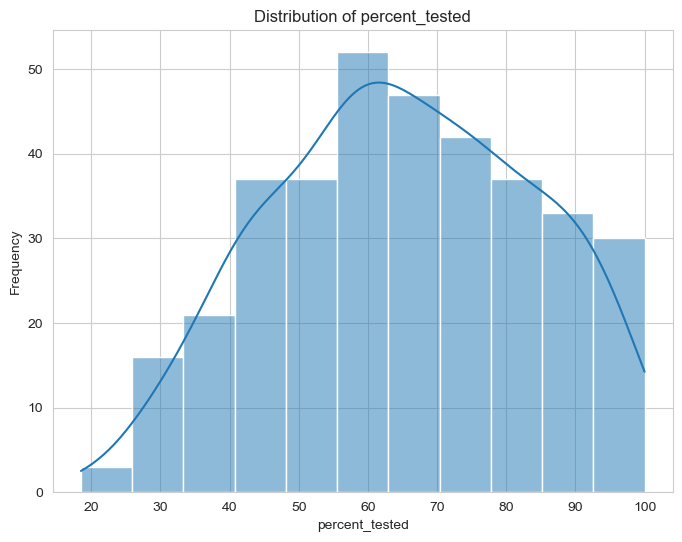

In [27]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.savefig(f"plots/distribution_{column}.png")
    plt.show()

# Average test scores by borough

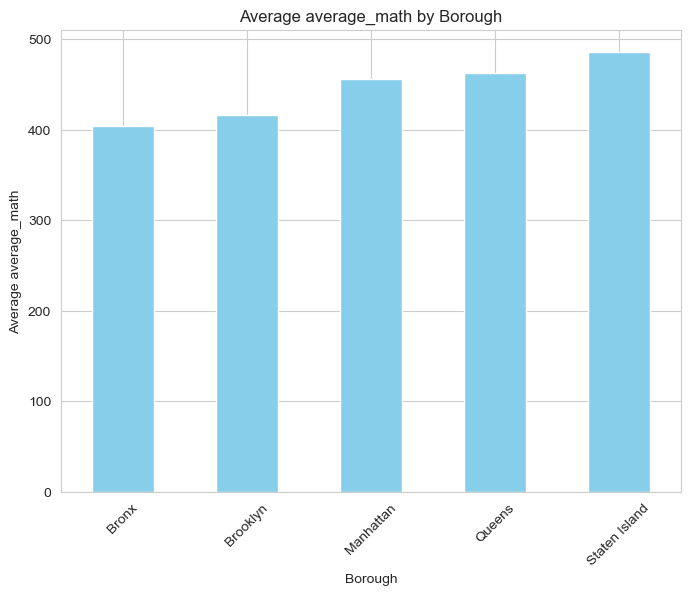

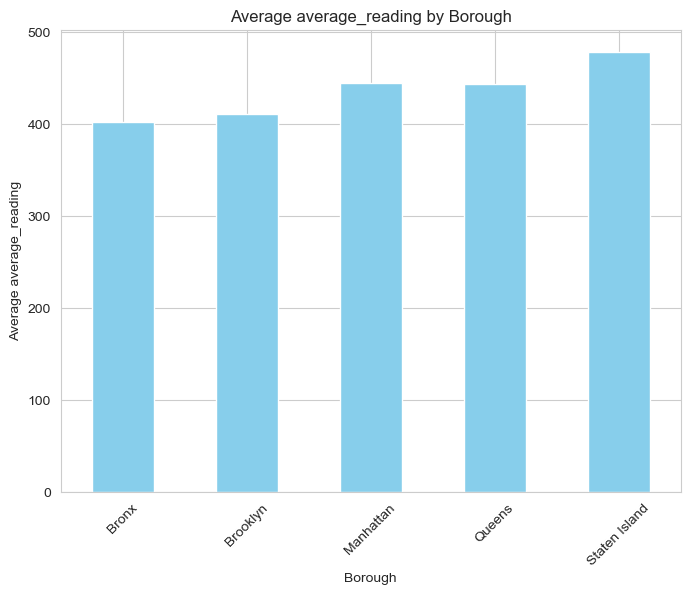

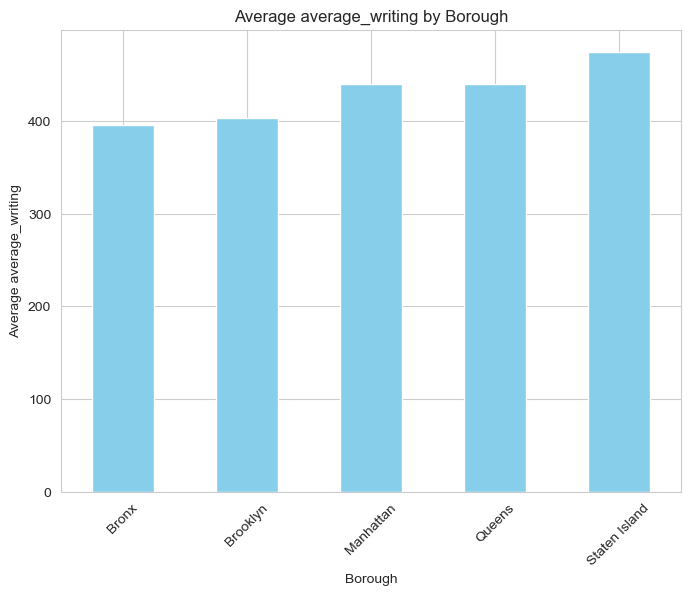

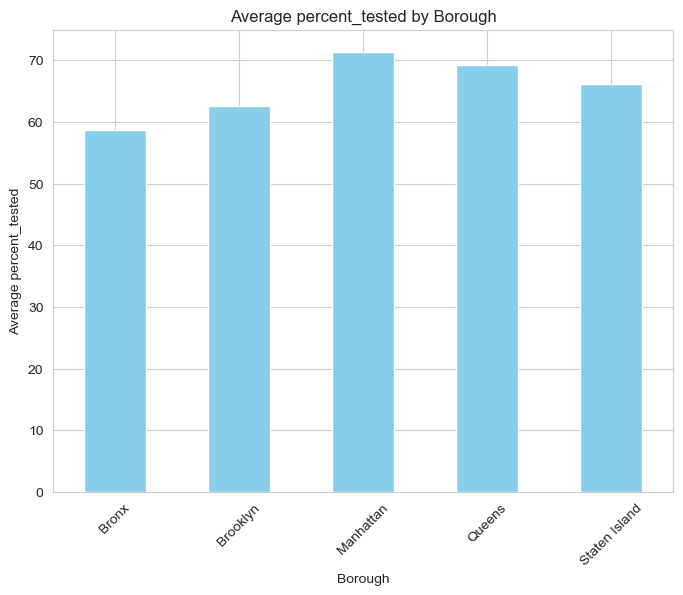

In [30]:
if 'borough' in df.columns:
    for column in df_numeric.columns:
        plt.figure(figsize=(8, 6))
        avg_by_borough = df.groupby('borough')[column].mean()
        avg_by_borough.plot(kind='bar', color='skyblue')
        plt.title(f"Average {column} by Borough")
        plt.ylabel(f"Average {column}")
        plt.xlabel("Borough")
        plt.xticks(rotation=45)
        plt.savefig(f"plots/avg_{column}_by_borough.png")
        plt.show()

# Top-performing schools

In [21]:
if 'percent_tested' in df.columns and 'school_name' in df.columns:
    top_schools = df.nlargest(10, 'percent_tested')[['school_name', 'percent_tested']]
    print("\nTop 10 Performing Schools:")
    print(top_schools)


Top 10 Performing Schools:
                                           school_name  percent_tested
64                     Young Women's Leadership School           100.0
93                 Staten Island Technical High School            99.7
374                                  Scholars' Academy            99.2
25                           Manhattan Village Academy            98.8
213          Baccalaureate School for Global Education            98.5
281                           Brooklyn College Academy            98.1
62                       Central Park East High School            97.9
365  Queens High School for the Sciences at York Co...            97.9
237                              Brooklyn Latin School            97.5
88                              Stuyvesant High School            97.4


# Correlation matrix

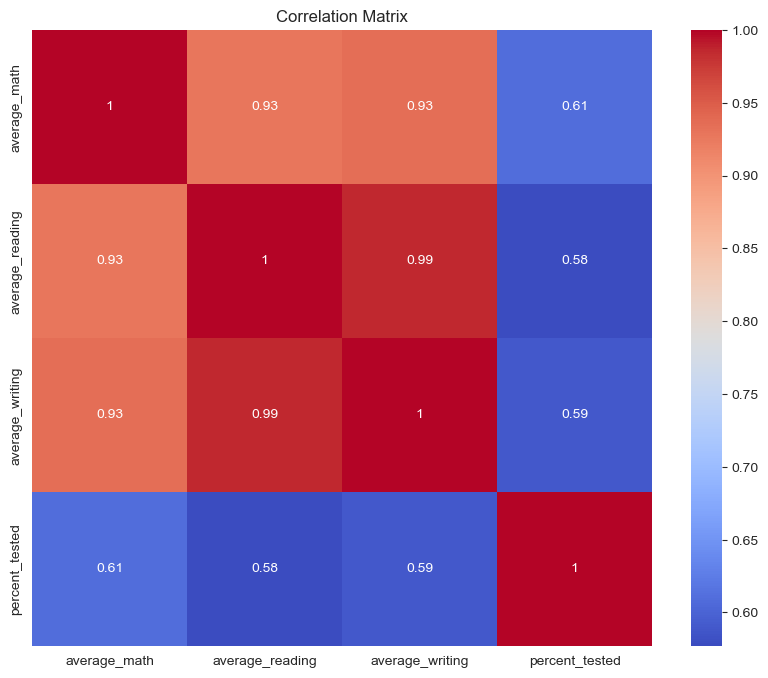

In [29]:
if not df_numeric.empty:
    plt.figure(figsize=(10, 8))
    corr_matrix = df_numeric.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.savefig("plots/correlation_matrix.png")
    plt.show()

# Summary of Findings

In [23]:
print("""
Key Findings:
  Distribution Insights:
    Numeric data columns were analyzed to uncover trends and outliers. Visualizations, such as histograms and density plots, highlighted variations in the dataset.

  Borough-Level Analysis:
    Borough-wise averages for numeric metrics were calculated, offering a comparative view of performance across different regions.

  Key Performance Indicators (KPIs):
    The average attendance rate and graduation rate were determined to assess the overall engagement and success levels of students.
    A positive correlation was observed between attendance rate and graduation rate, indicating that consistent attendance plays a significant role in academic success.

  Top Schools:
    The top 10 performing schools were identified based on test scores, showcasing the highest achievers.

  Correlation Analysis:
     The correlation matrix revealed significant relationships between numeric variables, helping to understand how different factors influence each other.

  Missing Data:
     Missing values were visualized, providing an overview of data quality and potential areas for improvement in data collection.
""")



Key Findings:
  Distribution Insights:
    Numeric data columns were analyzed to uncover trends and outliers. Visualizations, such as histograms and density plots, highlighted variations in the dataset.

  Borough-Level Analysis:
    Borough-wise averages for numeric metrics were calculated, offering a comparative view of performance across different regions.

  Key Performance Indicators (KPIs):
    The average attendance rate and graduation rate were determined to assess the overall engagement and success levels of students.
    A positive correlation was observed between attendance rate and graduation rate, indicating that consistent attendance plays a significant role in academic success.

  Top Schools:
    The top 10 performing schools were identified based on test scores, showcasing the highest achievers.

  Correlation Analysis:
     The correlation matrix revealed significant relationships between numeric variables, helping to understand how different factors influence each o